# Introduccion to Regression  with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're goen to simplify
it: predicting a numerical variable based on some other combination of variables, even
    shorter.... predicting a number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating data to view and fit


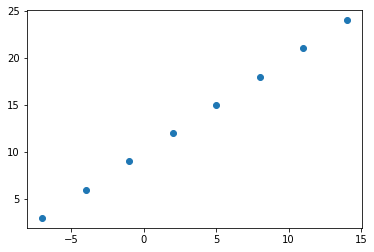

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# Visaulize it
plt.scatter(X,y);

In [4]:
 y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [6]:
# Create a demo tensor for our housing rice prediction problem

house_info = tf.constant(["bedroom", "batroom", "garage" ])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'batroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [21]:
# Turn our NumPy arrays into tensors with dtype float 32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape
# en este ejemplo aunque el tama;o salga como 0, realmente estamos usando la variable x para producir la variable y

(TensorShape([]), TensorShape([]))

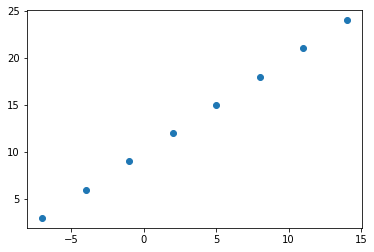

In [17]:
plt.scatter(X,y)

## Steps in modelling with tensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funtion(in others words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpretet the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels).




In [22]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
# en este caso estamos definiendo una capa con densidad 1, por que solo tenemos una entrada
model  = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              
             optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
             metrics =["mae"]
              
             
             )
# 3. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 374ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [23]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Try and make a predition using our model
y_pred =model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [26]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.
2. ***Compiling a model*- here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model**- here we might fit a model for more **epochs** (leave it training for longer) or on more data ( give the model more examples to learn from).


In [31]:
# Let's rebuild our model

# 1. Created the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model ( this time we'll train for longer)
model.fit(X,y, epochs=100)



Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8981 - mae: 6.8981
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss

In [32]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
# Let's see if our model's prediction has imrproved 
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [43]:
# Let's see if we can make another change to improve our model
# 1. create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
    
])

# 2. Compile the model
model.compile(loss="mae",
              # uno de los hiperparametros mas importantes es el learning rating
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 366ms/step - loss: 12.0125 - mae: 12.0125
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2511 - mae: 11.2511
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4828 - mae: 10.4828
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7066 - mae: 9.7066
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9205 - mae: 8.9205
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1219 - mae: 8.1219
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3079 - mae: 7.3079
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9190 - mae: 6.9190
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.2155 - mae: 7.2155
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4987 - mae: 7.4987
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 0.3358 - mae: 0.3358
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2589 - mae: 0.2589
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1354 - mae: 0.1354
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0939 - mae: 0.0939
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2230 - mae: 0.2230
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2548 - mae: 0.2548
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2268 - mae: 0.2268
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2665 - mae: 0.2665
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1667 - mae: 0.1667
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2063 - mae: 0.2063
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0644 - ma

In [44]:
#  Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
# Let's try to make a prediction
model.predict([17.0])

array([[26.260729]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model ->
fit it -> evaluate it --> fit it --> evaluate it ....```

When it comes to evaluation ... there are 3 words you shoudl memorize:
"Visualize, visualize, visualize"
It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up againt the grond truth, (the original labels)?


In [47]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [50]:
# Make labels for the dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

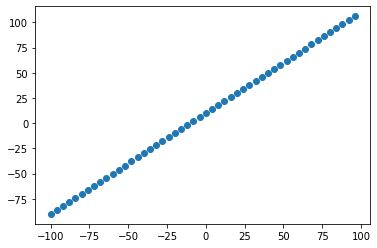

In [52]:
# Visualize the data 
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 set ...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you hava available.

* **Validation set** - the model gets tuned on  this data, which is typically 10 - 15% of the data available.

* **Test set** - the model gets evaluated on this  data to test what is has learned, this set is typically 10-15% of the total data available.


In [53]:
# Check the length of how many samples we have
len(X)

50

In [55]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples(80% of the  data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples(20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets ... let's visualize it againg!


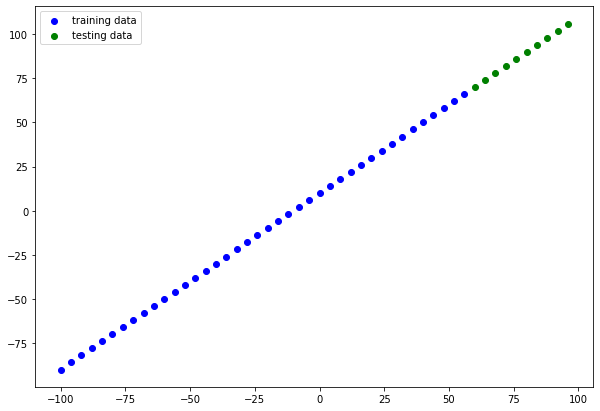

In [57]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="training data")# our model will learn on this
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="testing data")# want our model to be able to predict this(given X, what's y?)
#Show a legend
plt.legend();


In [58]:
# let's have a look at how to build a neural network for our data
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model

##model.fit(X_train, y_train, epochs = 100)


### Visualizing the model

In [60]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [63]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [89]:
# Let's create a model which build automatically by definning the input_shape argument in the first layers
tf.random.set_seed(42)

# 1. Create a model (same as above)
# recordar que el modo secuencial se ejecuta de arriba abajo
# el input_shape a veces hace falta especificarlo, y es el numero de features
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name ="output_layer")
    
], name = "model_1")

# 2. Compile the model(same as above)
# dense = fully conecteda, se refiere a las neuronas conectdas
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [90]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params- tota number of parameters in the model.(cantidad de patrones que el modelo intenta aprender dentro de la relacion entre x e y


* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* Non-trainable params - these parameters aren't updated during training
(this is typical when you bring in already learn patterns or parameteres from other model during transfer learning)

* los parametros que encontramos tambien se les dice pesos y bias
**Resource:** for a more in-depth overview of the trainable parameters whitin a layer, check out MIT's introduction to deeplearning video.

In [91]:
# Ler's fit our model to the training data

model.fit(X_train, y_train, epochs=100, verbose=0)

In [92]:
## Get a  summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [93]:
from tensorflow.keras.utils import plot_model

In [83]:
plot_model(model=model)
# para solucionar este error revisar el cuaderno de random forest

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against te ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs`y_pred`(ground truth versus your model's predictions



In [94]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [95]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [100]:
# Let's create a plotting function
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    """
    
    Plot training data, test data and compares predictions to ground truht Labels.
    
    """
    
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    
    plt.scatter(train_data, train_labels, c="b", label ="Training data")
    # Plot testing data in green
    
    plt.scatter(test_data, test_labels, c="g", label ="Testing data")
    
    # PLot model's predictions in red
    
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();
    
    

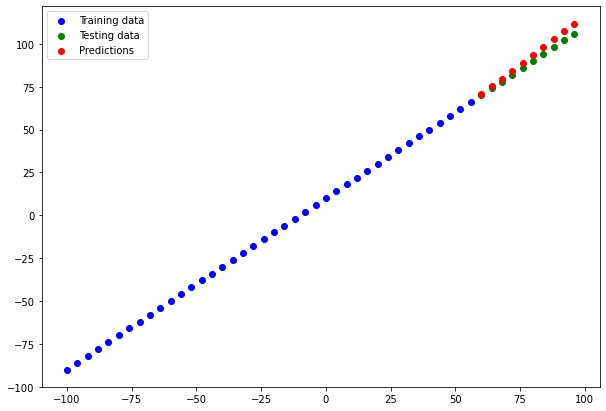

In [101]:
plot_predictions()

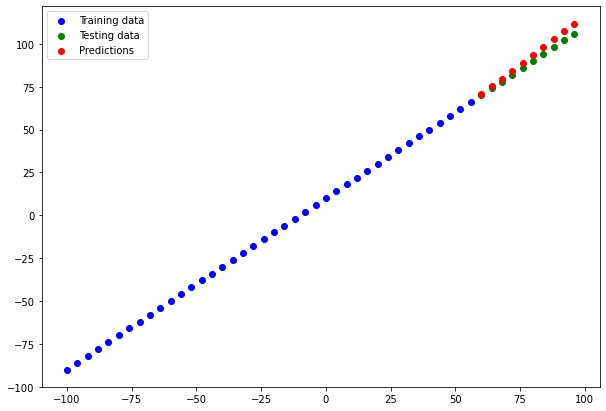

In [102]:
# for completeness.. also
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_preds)

### Evaluating our model's predictions with regression evaluation metrics


Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE- mean absolute error,"on average, how wrong is each of my model's predictions"

* MSE- mean square error, "square the average errors"

In [103]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 253ms/step - loss: 3.1969 - mae: 3.1969


[3.196941375732422, 3.196941375732422]

In [110]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [105]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [108]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred= tf.constant(y_preds))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253971 , 23.84169  ],
      dtype=float32)>

In [112]:
# Nos damos cuenta que y_preds tiene una dimension adicional que y_test, procedemos a retirarla
tf.squeeze(y_preds)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [114]:
# ahora que estan en la misma forma calculamos el MAE

mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_preds))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [117]:
# recuerda joel que estas trabajando con "y_preds"
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [180]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_preds))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test,
                                         y_pred=tf.squeeze(y_preds))
    
    
    

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it 

--> evaluate it --> tweak it --> evaluate it ...
```
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model)- this might come in the form of more layers or more hidden units in each layer.

3. Train for longer- give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1.`model_1` - same as the original model, 1 layer, trained for 100 epochs.

2.`model_2`- 2 layers, trained for 100 epochs

3. `model_3`- 2 layers, trained for 500 epochs

**Build`model_1`**




In [125]:
# Set random seed

tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics =["mae"])

# 3. Fit the model

model_1.fit(X_train, y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 12.2670 - mae: 12.2670
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 10.6052 - mae: 10.6052
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1986 - mae: 7.1986
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 13.0379 - mae: 13.0379
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1968 - mae: 7.1968
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 7.5386 - mae: 7.5386
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.0932 - mae: 7.0932
Epoch 94/100
2/2 [==============================] - 0s 9ms/step - loss: 12.8860 - mae: 12.8860
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9620 - mae: 9.9620
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7739 - mae: 8.7739
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 13.

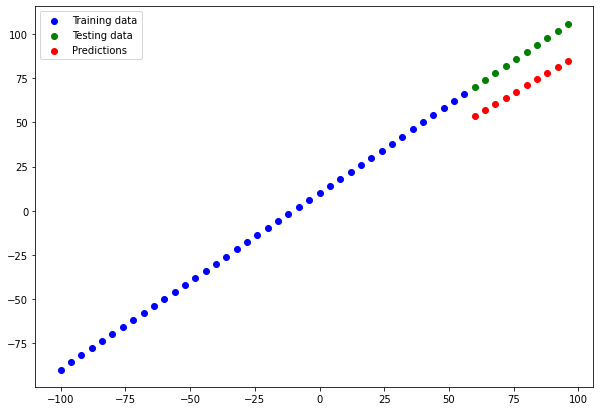

In [121]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [135]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [137]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [148]:
# Calculate model_2 evaluation metrics
# con la vieja funcion
#mae_1 = mae(y_test, tf.squeeze(y_preds_1))
#mse_1 = mse(y_test, tf.squeeze(y_preds_1))
# con la nueva funcion
mae_1 = mae(y_test, y_preds_1)

mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**
* 2  dense layers, trained for 100 epochs

In [151]:
y_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])>

In [150]:
# Set the random seed
tf.random.set_seed(42)


# 1. Create the model
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer =tf.keras.optimizers.SGD(),
                metrics=["mse"])

#  3. Fit the model

model_2.fit(X_train, y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 26.8627 - mse: 1015.8977
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 31.5187 - mse: 1433.3078
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8490 - mse: 1141.6672
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.6465 - mse: 267.4540
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 28.3537 - mse: 1129.8181
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 3ms/step - loss: 15.1583 - mse: 311.4819
Epoch 87/100
2/2 [==============================] - 0s 4ms/step - loss: 19.8683 - mse: 554.4751
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 30.7657 - mse: 1357.5448
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 9.7059 - mse: 108.4962
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 21.5531 - mse: 674.2963
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 9.5827 - mse: 128.0420
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 18.2158 - mse: 463.7710
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1935 - mse: 75.5075
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 17.4261 - mse: 438.1328
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1722 - mse: 164.3355
Epoch 96/100
2/2 [==============================] - 0s 3

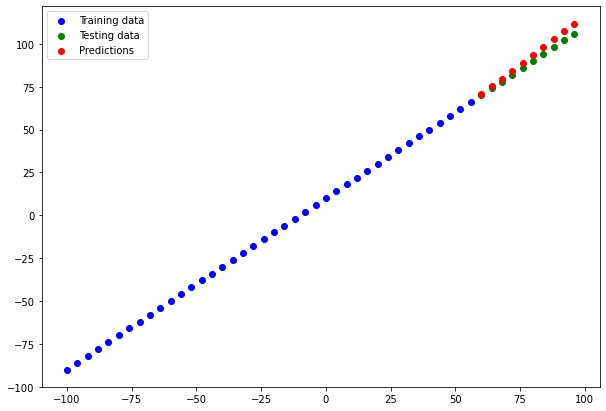

In [154]:
y_preds_2 = model_2.predict(X_test)

plot_predictions(predictions=y_preds_2)


In [181]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)

mse_2 = mse(y_test, y_preds_2)

mae_2,mse_2


(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**
* 2 layers, trainet for 500 epochs

In [157]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model

model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile  the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=["mae"] )

# 3. fit the model

model_3.fit(X_train, y_train, epochs = 500)





Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/500
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 19.8683 - mae: 19.8683
Epoch 88/500
2/2 [==============================] - 0s 3ms/step - loss: 30.7657 - mae: 30.7657
Epoch 89/500
2/2 [==============================] - 0s 4ms/step - loss: 9.7059 - mae: 9.7059
Epoch 90/500
2/2 [==============================] - 0s 2ms/step - loss: 21.5531 - mae: 21.5531
Epoch 91/500
2/2 [==============================] - 0s 3ms/step - loss: 9.5827 - mae: 9.5827
Epoch 92/500
2/2 [==============================] - 0s 2ms/step - loss: 18.2158 - mae: 18.2158
Epoch 93/500
2/2 [==============================] - 0s 2ms/step - loss: 7.1935 - mae: 7.1935
Epoch 94/500
2/2 [==============================] - 0s 3ms/step - loss: 17.4261 - mae: 17.4261
Epoch 95/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1722 - mae: 11.1722
Epoch 96/500
2/2 [==============================] - 0s 6ms/step - loss: 18.9207 - mae: 18.9207
Epoch 97/500
2/2 [==============================] - 0s 4ms/step - los

2/2 [==============================] - 0s 4ms/step - loss: 29.9900 - mae: 29.9900
Epoch 173/500
2/2 [==============================] - 0s 6ms/step - loss: 16.4918 - mae: 16.4918
Epoch 174/500
2/2 [==============================] - 0s 2ms/step - loss: 10.2796 - mae: 10.2796
Epoch 175/500
2/2 [==============================] - 0s 4ms/step - loss: 28.8074 - mae: 28.8074
Epoch 176/500
2/2 [==============================] - 0s 3ms/step - loss: 8.1042 - mae: 8.1042
Epoch 177/500
2/2 [==============================] - 0s 3ms/step - loss: 8.8722 - mae: 8.8722
Epoch 178/500
2/2 [==============================] - 0s 2ms/step - loss: 17.8721 - mae: 17.8721
Epoch 179/500
2/2 [==============================] - 0s 4ms/step - loss: 10.4428 - mae: 10.4428
Epoch 180/500
2/2 [==============================] - 0s 2ms/step - loss: 7.2716 - mae: 7.2716
Epoch 181/500
2/2 [==============================] - 0s 3ms/step - loss: 17.0166 - mae: 17.0166
Epoch 182/500
2/2 [==============================] - 0s 3ms/

Epoch 258/500
2/2 [==============================] - 0s 4ms/step - loss: 13.8021 - mae: 13.8021
Epoch 259/500
2/2 [==============================] - 0s 3ms/step - loss: 8.3765 - mae: 8.3765
Epoch 260/500
2/2 [==============================] - 0s 5ms/step - loss: 45.7482 - mae: 45.7482
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 18.1356 - mae: 18.1356
Epoch 262/500
2/2 [==============================] - 0s 5ms/step - loss: 6.3169 - mae: 6.3169
Epoch 263/500
2/2 [==============================] - 0s 3ms/step - loss: 13.7269 - mae: 13.7269
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 22.1387 - mae: 22.1387
Epoch 265/500
2/2 [==============================] - 0s 3ms/step - loss: 19.3150 - mae: 19.3150
Epoch 266/500
2/2 [==============================] - 0s 2ms/step - loss: 10.9408 - mae: 10.9408
Epoch 267/500
2/2 [==============================] - 0s 3ms/step - loss: 6.7507 - mae: 6.7507
Epoch 268/500
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.6574 - mae: 8.6574
Epoch 344/500
2/2 [==============================] - 0s 3ms/step - loss: 5.2876 - mae: 5.2876
Epoch 345/500
2/2 [==============================] - 0s 3ms/step - loss: 39.5019 - mae: 39.5019
Epoch 346/500
2/2 [==============================] - 0s 3ms/step - loss: 16.1694 - mae: 16.1694
Epoch 347/500
2/2 [==============================] - 0s 4ms/step - loss: 12.1610 - mae: 12.1610
Epoch 348/500
2/2 [==============================] - 0s 4ms/step - loss: 7.1087 - mae: 7.1087
Epoch 349/500
2/2 [==============================] - 0s 4ms/step - loss: 12.9491 - mae: 12.9491
Epoch 350/500
2/2 [==============================] - 0s 2ms/step - loss: 16.1665 - mae: 16.1665
Epoch 351/500
2/2 [==============================] - 0s 3ms/step - loss: 34.0546 - mae: 34.0546
Epoch 352/500
2/2 [==============================] - 0s 3ms/step - loss: 14.2397 - mae: 14.2397
Epoch 353/500
2/2 [==============================] - 0s 2ms/

2/2 [==============================] - 0s 3ms/step - loss: 9.7413 - mae: 9.7413
Epoch 430/500
2/2 [==============================] - 0s 5ms/step - loss: 10.3967 - mae: 10.3967
Epoch 431/500
2/2 [==============================] - 0s 4ms/step - loss: 9.5247 - mae: 9.5247
Epoch 432/500
2/2 [==============================] - 0s 3ms/step - loss: 10.4026 - mae: 10.4026
Epoch 433/500
2/2 [==============================] - 0s 3ms/step - loss: 9.5572 - mae: 9.5572
Epoch 434/500
2/2 [==============================] - 0s 3ms/step - loss: 31.0641 - mae: 31.0641
Epoch 435/500
2/2 [==============================] - 0s 3ms/step - loss: 8.7320 - mae: 8.7320
Epoch 436/500
2/2 [==============================] - 0s 3ms/step - loss: 30.4039 - mae: 30.4039
Epoch 437/500
2/2 [==============================] - 0s 5ms/step - loss: 7.2410 - mae: 7.2410
Epoch 438/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4983 - mae: 11.4983
Epoch 439/500
2/2 [==============================] - ETA: 0s - l

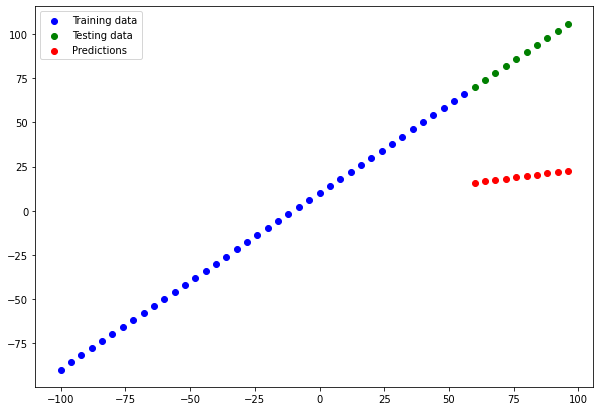

In [159]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

# overfitting, the model not generalize

In [160]:
# Calculete model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)

mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3


(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments


**Note:** You want to start with small experiments( small models) and make sure they work and then increase their scale when necessary.

We've run a few experiments, let's compare the results.

In [164]:
# let's compare our model's results using a pandas DataFrame

import pandas as pd
# transformarmos los tensores a array para que puedan visualizarse bien dentro del data set

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], ["model_2", mae_2.numpy(), mse_2.numpy()], ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results= pd.DataFrame(model_results, columns = ["model", "mae", "mse"] )
all_results


,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


Looks like model_2 performed the best...

In [165]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remenber the machine learning practioner's motto: "experiment, experiment, experiment".

    

## Tracking your experiments

One  really good habit in machine learning modelling is to track the result of your experiments.

And when doing so, it can be tedious if you're running lots of experiments

Luckily there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modeling experiments(we'll see this one later).


* Weights & Biases - a tool for tracking all of kinds of machine learning experiments ( plugs straight into TensorBoard).

    
    

## Saving our models

Saving our models allows us to use then outside of Google Colab(or wherever they were trained) such as in a web application or mobile app.

There are two main formats we can save our model's too:
1. The SaveModel format

2. The HDF5 format


In [166]:
# con este formato es mejor para usarlo denuevo de tensor flow
# Save model using the SavedModel format
model_2.save("best_model_SaveModel_format")

INFO:tensorflow:Assets written to: best_model_SaveModel_format\assets


In [167]:
# con este formato es mejor para usarlo en aplicaciones externas
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading a save model

In [168]:
# Load in the SaveModel format model

loaded_SaveModel_format = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [169]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [171]:
# Compare model_2 predictions with SaveModel format model predictions
model_2_preds = model_2.predict(X_test)

loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)

model_2_preds == loaded_SaveModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [172]:
model_2_preds, loaded_SaveModel_format_preds

(array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32),
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32))

In [183]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SaveModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [185]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [186]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [189]:
# Check to see if loaded .h5 model predictions match model_2

model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model( or any other file) from Google Colab

If you want to download your files from  Google Colab:
1. You can go to the "files" tab and right click on the file, you're after and click "download".

2. Use code( see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there. ( see 2dn code cell below).

In [191]:
# Download a file from Google Colab
# from google.colab import files
# files.download("ruta del archivo")


In [192]:
# Save a file from Google Colab to Google Drive (requires mounting Goodle Drive)
# ! cp path1 path 2

# A larger example

In [194]:
# Read in the insurance dataset, para copiar un data set directo desde kagle usamos pandas, y le pasamos el link de los datos crudos
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [196]:
#  variables de tipo objeto
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [198]:
# tenemos variables numericas y categoricas, para trabajar debemos transformar las categorias numeros, uno de los metodos es el one hot encoder
# Let'w try one-hot enconde our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [199]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [200]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [202]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state = 42)
len(X), len(X_train), len(X_test)`

(1338, 1070, 268)

In [203]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [204]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [205]:
# Build a neural network (sort of like model_2_above)
tf.random.set_seed(42)
# 1. Create a model
insurance_model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1923 - mae: 7718.1923
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8083.4828 - mae: 8083.4828
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7793.8447 - mae: 7793.8447
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7618.4111 - mae: 7618.4111
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4979 - mae: 7678.4979
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8135 - mae: 7588.8135
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6832 - mae: 7520.68

34/34 [==============================] - 0s 1ms/step - loss: 7216.2091 - mae: 7216.2091
Epoch 82/100
34/34 [==============================] - 0s 1ms/step - loss: 7774.2741 - mae: 7774.2741
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 7156.2556 - mae: 7156.2556
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 7436.0033 - mae: 7436.0033
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 6855.7935 - mae: 6855.7935
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 7768.8278 - mae: 7768.8278
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7014.5799 - mae: 7014.5799
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 7525.7777 - mae: 7525.7777
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 6994.6073 - mae: 6994.6073
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 7677.9606 - mae: 7677.9606
Epo

In [207]:
# Check the result of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [210]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well let's try and improve it !

To (try) improve our model, we'll run 2 experments:
1. Add an extra layer with more hidden units and use Adeam optimizer
2. Same as above but train for longer(200 epochs)
3. ( insert your own experiment here)

In [213]:
# Set random seed

tf.random.set_seed(42)

# 1. Create the model

insurance_model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics =["mae"])
# 3.Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [214]:
# Evaluate the larger model

insurance_model_2.evaluate(X_test, y_test)



9/9 [==============================] - 0s 1ms/step - loss: nan - mae: nan


[nan, nan]

In [215]:
# en el codigo de arriba parece que agregar la capa con 100 unidades, nos da un problema
# proberamos cambiando el optimizador
# Set random seed

tf.random.set_seed(42)

# 1. Create the model

insurance_model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          
                          # cambiamos el optimizador a Adam()
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics =["mae"])
# 3.Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [216]:
insurance_model_2.evaluate(X_test, y_test)


9/9 [==============================] - 0s 1ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [217]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [220]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model( same as above)

insurance_model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics =["mae"])

# 3 Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs =200)



Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11243.3973 - mae: 11243.3973
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7537.6738 - mae: 7537.6738
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

34/34 [==============================] - 0s 1ms/step - loss: 6548.7321 - mae: 6548.7321
Epoch 83/200
34/34 [==============================] - 0s 1ms/step - loss: 5722.6892 - mae: 5722.6892
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 5570.2336 - mae: 5570.2336
Epoch 85/200
34/34 [==============================] - 0s 1ms/step - loss: 5121.8587 - mae: 5121.8587
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 5889.9363 - mae: 5889.9363
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 5472.2751 - mae: 5472.2751
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 5770.0214 - mae: 5770.0214
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 5392.7428 - mae: 5392.7428
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 5951.3922 - mae: 5951.3922
Epoch 91/200
34/34 [==============================] - 0s 1ms/step - loss: 5577.1111 - mae: 5577.1111
Epo

34/34 [==============================] - 0s 1ms/step - loss: 3695.4663 - mae: 3695.4663
Epoch 162/200
34/34 [==============================] - 0s 1ms/step - loss: 3844.5049 - mae: 3844.5049
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 3434.5003 - mae: 3434.5003
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 3657.7763 - mae: 3657.7763
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3725.6674 - mae: 3725.6674
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 3876.2255 - mae: 3876.2255
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 4018.4551 - mae: 4018.4551
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 3753.0690 - mae: 3753.0690
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 3595.9370 - mae: 3595.9370
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 3880.9856 - mae: 3880

In [221]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)


9/9 [==============================] - 0s 1ms/step - loss: 3488.7859 - mae: 3488.7859


[3488.785888671875, 3488.785888671875]

In [222]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Text(0.5, 0, 'epochs')

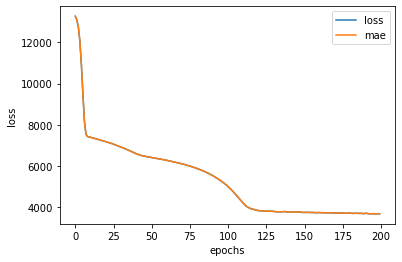

In [223]:
# Plot history (olso known as a loss curve or a training curve)

# importantisimo, al guardar el progreso de nuestro modelo al ajustar nos permite generar esta curva, descenso de las perdidas
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?
it depends. Really .... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback), which is a TensorFlow componet you can add to your model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.

if you're not sure on which to use, you could try both and see which perfoms better.


In [224]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [225]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

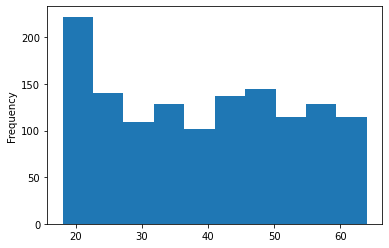

In [226]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

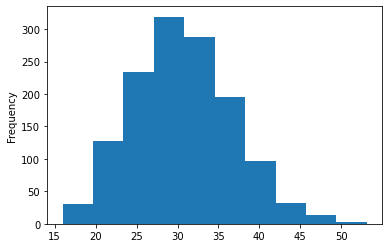

In [227]:
X["bmi"].plot(kind="hist")

In [228]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
# Read in the insurance dataframe

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [232]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer




In [233]:
ct = make_column_transformer(
     (MinMaxScaler(), ["age", "bmi", "children"]),# turn all values in these columns beteween 0 and 1
     (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    
)

# Create  X & y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Fit the column transformer to our training data
# importantisimo separar primero antes de aplicar las transformaciones pertinentes
# "ajustamos" nuestra transformacion a un array
ct.fit(X_train)

# transform training and test data with normalization(MinMaxScaler) and OnehotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [234]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [235]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [236]:
# Ahora esto todo en un formato numerico y podemos utilizarlo 

X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful !  Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.


In [238]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])


# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model, ahora usaremos el X_train_normalizado

insurance_model_4.fit(X_train_normal, y_train, epochs = 100)



Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12304.99

34/34 [==============================] - 0s 2ms/step - loss: 3560.1418 - mae: 3560.1418
Epoch 82/100
34/34 [==============================] - 0s 1ms/step - loss: 4082.1638 - mae: 4082.1638
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 3690.6049 - mae: 3690.6049
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 3491.1417 - mae: 3491.1417
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 3196.7645 - mae: 3196.7645
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 3696.4112 - mae: 3696.4112
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 3584.8877 - mae: 3584.8877
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3717.8065 - mae: 3717.8065
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3437.4365 - mae: 3437.4365
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3799.4690 - mae: 3799.4690
Epo

In [237]:
insurance_model_2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [239]:
# Evaluate our insurance model trained on normalized data (test data normalizaa)
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
# debido a la normalizacion hemos conseguido una reducion del error en un 30%
# el modelo converge mas rapido y con mejores resultados y en menos epocas
